In [1]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.ensemble import GradientBoostingRegressor
gbc = GradientBoostingRegressor()
from sklearn.ensemble import RandomForestClassifier
r = RandomForestClassifier()
from sklearn.tree import DecisionTreeClassifier
d = DecisionTreeClassifier()
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()
from sklearn.neighbors import KNeighborsClassifier
k = KNeighborsClassifier()
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
g = GaussianNB()
b = BernoulliNB()
from xgboost import XGBClassifier
xgbc = XGBClassifier()

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [3]:
df1 = pd.read_csv("train.csv")

In [4]:
df1.shape

(891, 12)

In [5]:
df2 = pd.read_csv("test.csv")

In [6]:
df2.shape

(418, 11)

In [7]:
df = df1.append(df2) #iki dataframe i birleştirme

In [8]:
df.shape

(1309, 12)

### EDA

In [9]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,NaN,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [11]:
df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
472,473,1.0,2,"West, Mrs. Edwy Arthur (Ada Mary Worth)",female,33.0,1,2,C.A. 34651,27.7500,NaN,S
334,335,1.0,1,"Frauenthal, Mrs. Henry William (Clara Heinshei...",female,NaN,1,0,PC 17611,133.6500,NaN,S
257,1149,NaN,3,"Niklasson, Mr. Samuel",male,28.0,0,0,363611,8.0500,NaN,S
272,1164,NaN,1,"Clark, Mrs. Walter Miller (Virginia McDowell)",female,26.0,1,0,13508,136.7792,C89,C
360,361,0.0,3,"Skoog, Mr. Wilhelm",male,40.0,1,4,347088,27.9000,NaN,S


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


In [13]:
df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [14]:
df.Embarked.value_counts() # kaç tane nerden bindiğini gösteriyor

S    914
C    270
Q    123
Name: Embarked, dtype: int64

In [15]:
df.Embarked.value_counts(normalize = True) #yüzdelik olarak gösteriyor

S    0.699311
C    0.206580
Q    0.094109
Name: Embarked, dtype: float64

In [16]:
# titleları sırala mr miss diye
df["Title"] = df["Name"].str.extract(" ([A-Za-z]+)\.")
df["Title"].value_counts()

Mr          757
Miss        260
Mrs         197
Master       61
Rev           8
Dr            8
Col           4
Mlle          2
Major         2
Ms            2
Lady          1
Sir           1
Mme           1
Don           1
Capt          1
Countess      1
Jonkheer      1
Dona          1
Name: Title, dtype: int64

In [17]:
#yukarıda ismi yanlış yazılanlar var mesela ms = miss demek o yüzden onları eşitleyeceğiz
df["Title"] = df["Title"].replace(["Ms","Mlle"],"Miss")
df["Title"] = df["Title"].replace(["Mme","Lady","Countess","Dona"],"Mrs")
df["Title"] = df["Title"].replace(["Dr","Major","Col","Sir","Rev","Jonkheer","Capt","Don"],"Mr") #rev papaz

In [18]:
df.Title.value_counts()

Mr        783
Miss      264
Mrs       201
Master     61
Name: Title, dtype: int64

In [19]:
#groupby
df["Age"].fillna(df.groupby("Title")["Age"].transform("median"),inplace=True)
df.groupby("Title")["Age"].transform("median")

0      30.0
1      35.5
2      22.0
3      35.5
4      30.0
       ... 
413    30.0
414    35.5
415    30.0
416    30.0
417     4.0
Name: Age, Length: 1309, dtype: float64

In [20]:
#median bul doldur
df["Fare"].fillna(df["Fare"].mean(),inplace= True)

In [21]:
df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age               0
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin          1014
Embarked          2
Title             0
dtype: int64

In [22]:
#kabinda çok boş yani verinin %20 sinden az olduğu için siliyoruz
del df["Cabin"]

In [23]:
#Family olup olmadığını yapıyoruz fillna ile boşluk doldurcaz ayrıca
df["Family"]=df["SibSp"]+df["Parch"]+1

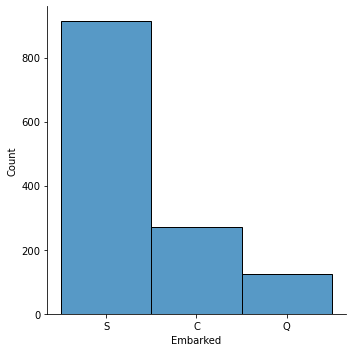

In [24]:
#embarked larda boş olan yerleri doldurma yap
sns.displot(df.Embarked)

In [25]:
#fillna ile en çok binilen yeri dolduruyoruz
df["Embarked"] = df["Embarked"].fillna("S")

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1309 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1309 non-null   float64
 10  Embarked     1309 non-null   object 
 11  Title        1309 non-null   object 
 12  Family       1309 non-null   int64  
dtypes: float64(3), int64(5), object(5)
memory usage: 143.2+ KB


In [27]:
# pass id ile ticket bi ayrıcalık sağlmadığı için sliliyoruz
del df["PassengerId"]

In [28]:
del df["Name"]

In [29]:
del df["Ticket"]

In [30]:
#dummies varible uygula
df_dummies=pd.get_dummies(df,drop_first=True)

In [31]:
df_dummies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    float64
 1   Pclass      1309 non-null   int64  
 2   Age         1309 non-null   float64
 3   SibSp       1309 non-null   int64  
 4   Parch       1309 non-null   int64  
 5   Fare        1309 non-null   float64
 6   Family      1309 non-null   int64  
 7   Sex_male    1309 non-null   uint8  
 8   Embarked_Q  1309 non-null   uint8  
 9   Embarked_S  1309 non-null   uint8  
 10  Title_Miss  1309 non-null   uint8  
 11  Title_Mr    1309 non-null   uint8  
 12  Title_Mrs   1309 non-null   uint8  
dtypes: float64(3), int64(4), uint8(6)
memory usage: 89.5 KB


In [32]:
# veriyi ayıryoruz 
df_train=df_dummies[:891]
df_test=df_dummies[891:]

In [33]:
df_train.shape

(891, 13)

In [34]:
df_test.shape

(418, 13)

In [35]:
del df_train["Survived"]

In [36]:
y= df1["Survived"]

In [37]:
df_dummies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    float64
 1   Pclass      1309 non-null   int64  
 2   Age         1309 non-null   float64
 3   SibSp       1309 non-null   int64  
 4   Parch       1309 non-null   int64  
 5   Fare        1309 non-null   float64
 6   Family      1309 non-null   int64  
 7   Sex_male    1309 non-null   uint8  
 8   Embarked_Q  1309 non-null   uint8  
 9   Embarked_S  1309 non-null   uint8  
 10  Title_Miss  1309 non-null   uint8  
 11  Title_Mr    1309 non-null   uint8  
 12  Title_Mrs   1309 non-null   uint8  
dtypes: float64(3), int64(4), uint8(6)
memory usage: 89.5 KB


In [38]:
algorithms=[g,b,k,gbc,r,d,xgbc]
names=["GaussianNB","BernoulliNB","K Nearest","GradientBoosting","RandomForest","Decision Tree","XGBC"]


In [39]:
def algo_test(X,y,algorithms= algorithms,names=names):
        # fit the data
    for i in range(len(algorithms)):
        algorithms[i]=algorithms[i].fit(X,y)
    # print metrics
    accuracy = []
    precision = []
    recall = []
    f1 = []
    for i in range(len(algorithms)):
        accuracy.append(accuracy_score(y,algorithms[i].predict(X).round(),normalize=False))
        precision.append(precision_score(y,algorithms[i].predict(X).round()))
        recall.append(recall_score(y,algorithms[i].predict(X).round()))
        f1.append(f1_score(y,algorithms[i].predict(X).round()))
    metrics = pd.DataFrame(columns=["accuracy","precision","recall","f1"],index=names)
    metrics["accuracy"]=accuracy
    metrics["precision"]=precision
    metrics["recall"]=recall
    metrics["f1"]=f1
    return metrics.sort_values("f1",ascending=False)

In [40]:
algo_test(df_train,y)

,accuracy,precision,recall,f1
RandomForest,873,0.979290,0.967836,0.973529
Decision Tree,873,0.993902,0.953216,0.973134
XGBC,858,0.969605,0.932749,0.950820
GradientBoosting,787,0.894040,0.789474,0.838509
K Nearest,729,0.790323,0.716374,0.751534
GaussianNB,708,0.752381,0.692982,0.721461
BernoulliNB,700,0.735202,0.690058,0.711916


In [41]:
#test te ki survived i sil
del df_test["Survived"]

In [42]:
#tahmin et
pred=r.predict(df_test)

In [43]:
pred

array([0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [44]:
result=df2[["PassengerId"]]

In [45]:
result["Survived"]=pred

In [46]:
#kaydet index siz+
result.to_csv("titanic_tahmini.csv",index=False)